In [71]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [10]:
data=pd.read_csv('Absenteeism_at_work.csv')
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [11]:
data.rename(columns=({"Absenteeism time in hours":"AbsHours", "Reason for absence": "Res_for_abs", "Month of absence":"Month_of_abs", "Day of the week":"Dow","Transportation expense":"Trans_expense", "Distance from Residence to Work":"Dist_res_work", "Service time":"Serv_time",
                     "Work load Average/day":"Work_load_Avg/day","Hit target":"Hit_target", "Disciplinary failure":"Disciplin_fail", "Social drinker":"Social_drinker","Social smoker":"Social_smoker","Body mass index":"BMI"}), inplace=True)

In [12]:
data.head()

,ID,Res_for_abs,Month_of_abs,Dow,Seasons,Trans_expense,Dist_res_work,Serv_time,Age,Work_load_Avg/day,Hit_target,Disciplin_fail,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,BMI,AbsHours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                   740 non-null int64
Res_for_abs          740 non-null int64
Month_of_abs         740 non-null int64
Dow                  740 non-null int64
Seasons              740 non-null int64
Trans_expense        740 non-null int64
Dist_res_work        740 non-null int64
Serv_time            740 non-null int64
Age                  740 non-null int64
Work_load_Avg/day    740 non-null float64
Hit_target           740 non-null int64
Disciplin_fail       740 non-null int64
Education            740 non-null int64
Son                  740 non-null int64
Social_drinker       740 non-null int64
Social_smoker        740 non-null int64
Pet                  740 non-null int64
Weight               740 non-null int64
Height               740 non-null int64
BMI                  740 non-null int64
AbsHours             740 non-null int64
dtypes: float64(1), int64(20)
memory usage: 121.5 KB


In [14]:
data.describe()

,ID,Res_for_abs,Month_of_abs,Dow,Seasons,Trans_expense,Dist_res_work,Serv_time,Age,Work_load_Avg/day,Hit_target,Disciplin_fail,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,BMI,AbsHours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


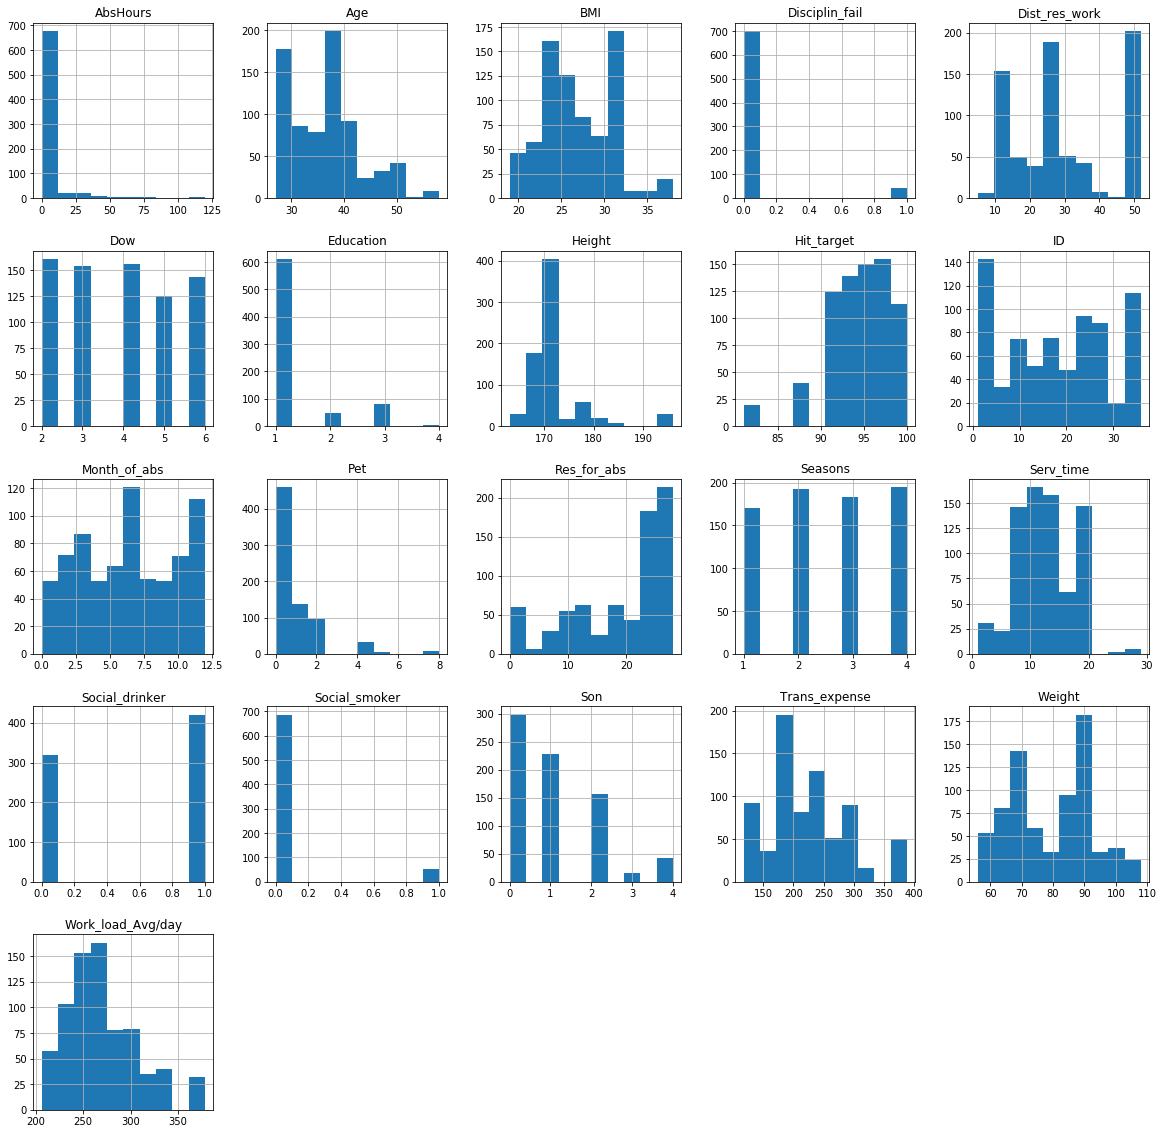

In [15]:
data.hist(figsize=(20,20))
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x295cf2b7a88>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x295ce8c8288>,
 'cmins': <matplotlib.collections.LineCollection at 0x295cf808a88>,
 'cbars': <matplotlib.collections.LineCollection at 0x295cf808048>}

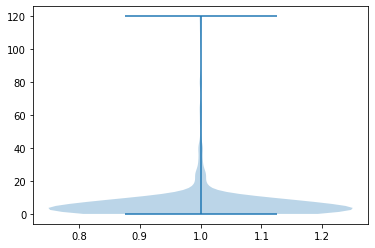

In [16]:
plt.violinplot(data['AbsHours'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x295ceb29fc8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x295ce6aac08>,
 'cmins': <matplotlib.collections.LineCollection at 0x295ceb36a88>,
 'cbars': <matplotlib.collections.LineCollection at 0x295ceb36f48>}

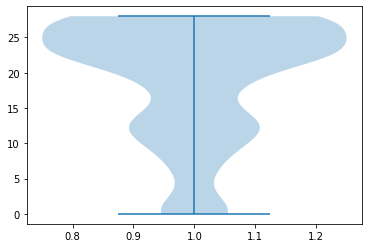

In [18]:
plt.violinplot(data['Res_for_abs'])

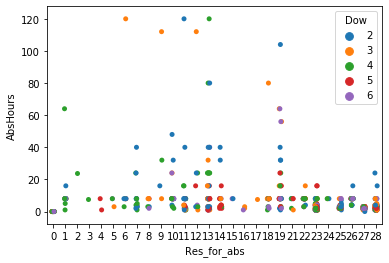

In [19]:
sns.stripplot('Res_for_abs','AbsHours',hue='Dow',data=data)

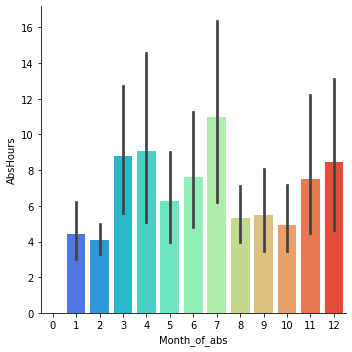

In [20]:
sns.catplot('Month_of_abs','AbsHours',data=data,palette='rainbow',kind='bar')

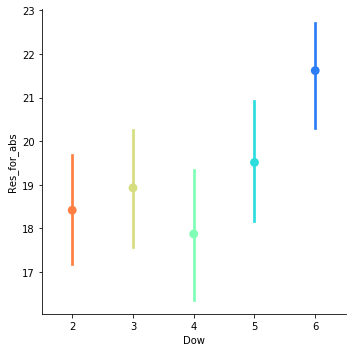

In [21]:
sns.catplot('Dow','Res_for_abs',data=data,palette='rainbow_r',kind='point')

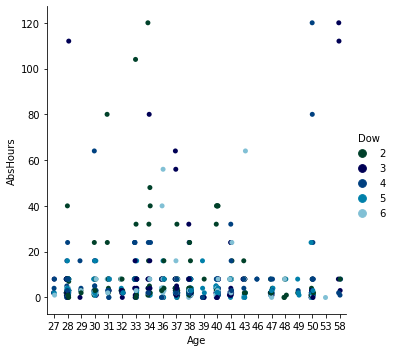

In [22]:
sns.catplot('Age','AbsHours',hue='Dow',data=data,palette='ocean',kind='strip')

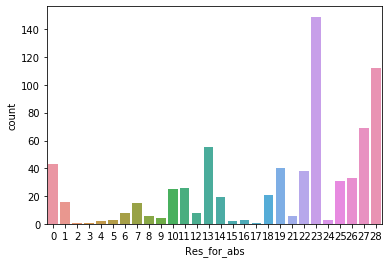

In [23]:
sns.countplot(data['Res_for_abs'])

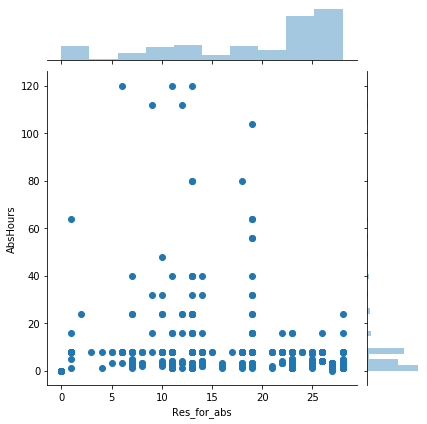

In [24]:
sns.jointplot('Res_for_abs','AbsHours',data=data,kind='scatter')

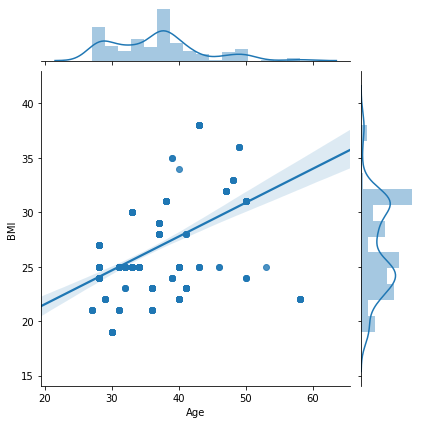

In [25]:
sns.jointplot('Age','BMI',data=data,kind='reg')

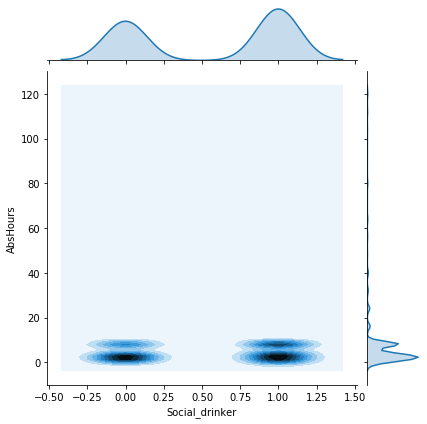

In [27]:
sns.jointplot('Social_drinker','AbsHours',data=data,kind='kde')

In [28]:
data.isnull().sum().sum()

0

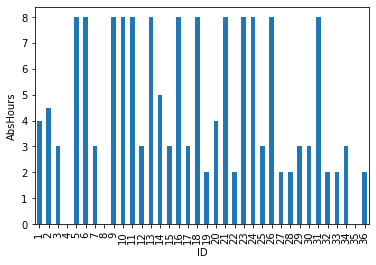

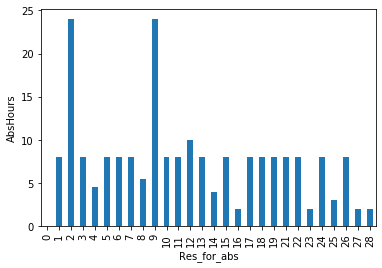

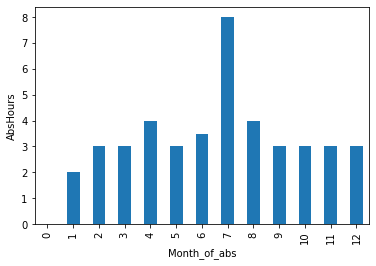

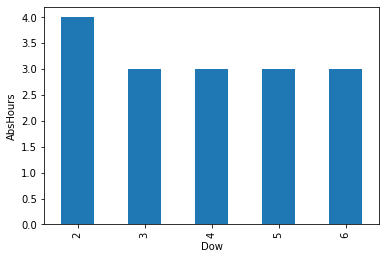

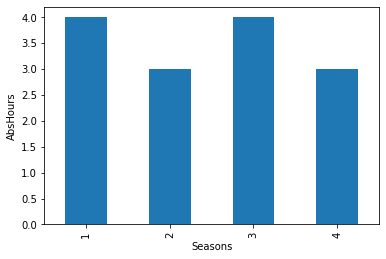

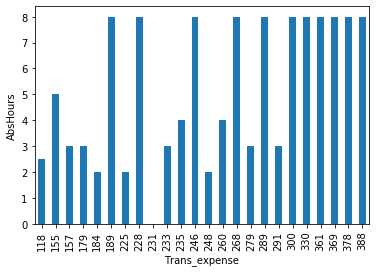

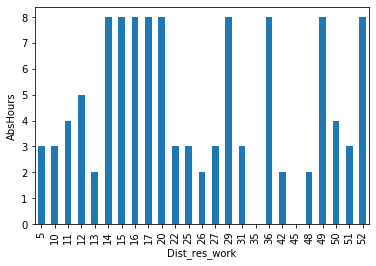

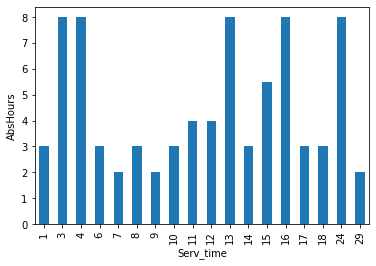

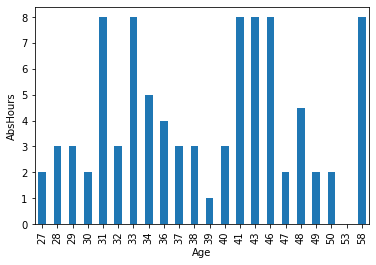

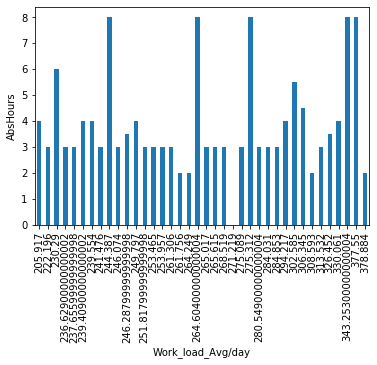

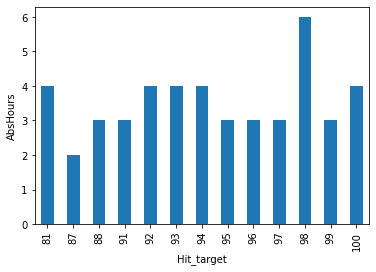

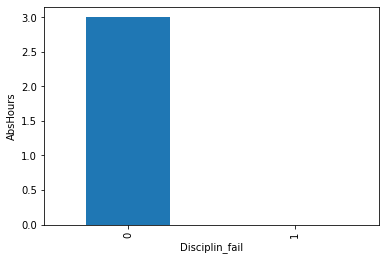

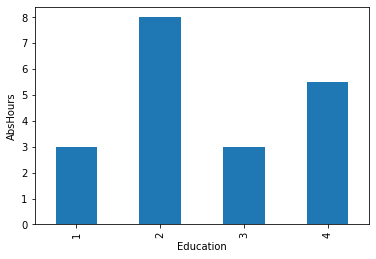

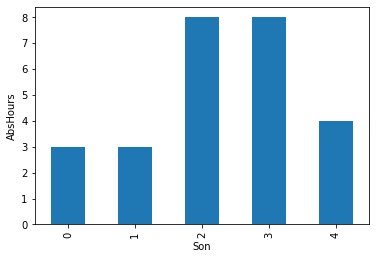

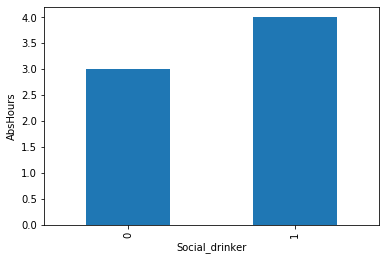

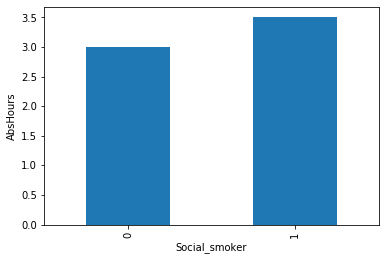

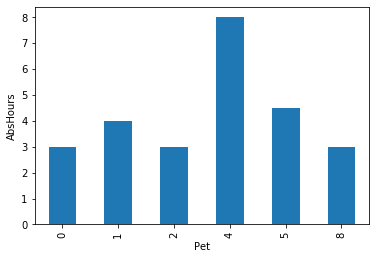

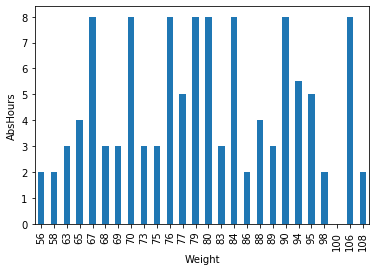

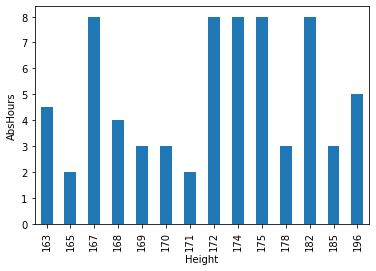

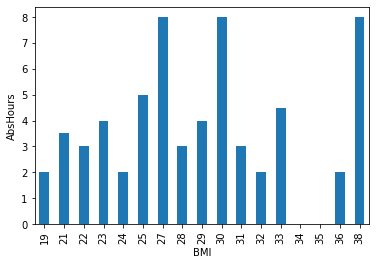

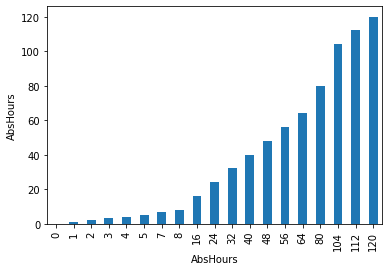

In [29]:
for feature in data.columns:
    df = data.copy()
    
    df.groupby(feature)["AbsHours"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("AbsHours")
    #plt.title(feature)
    plt.show()

(21.0, 0.0)

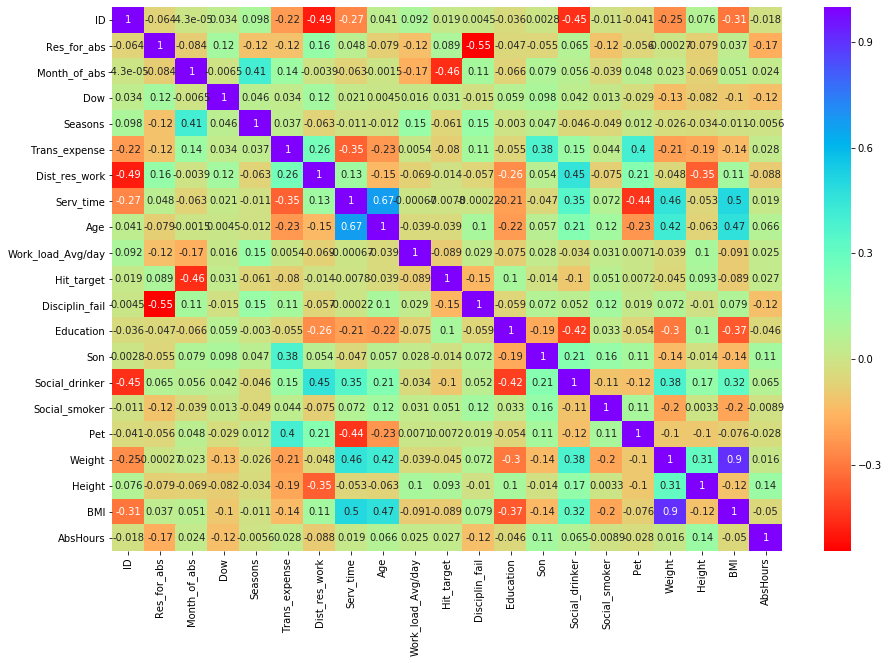

In [31]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(),cmap='rainbow_r',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

In [33]:
data.columns

Index(['ID', 'Res_for_abs', 'Month_of_abs', 'Dow', 'Seasons', 'Trans_expense',
       'Dist_res_work', 'Serv_time', 'Age', 'Work_load_Avg/day', 'Hit_target',
       'Disciplin_fail', 'Education', 'Son', 'Social_drinker', 'Social_smoker',
       'Pet', 'Weight', 'Height', 'BMI', 'AbsHours'],
      dtype='object')

In [35]:
X = data.loc[:,['ID', 'Res_for_abs', 'Month_of_abs', 'Dow', 'Seasons', 'Trans_expense',
       'Dist_res_work', 'Serv_time', 'Age', 'Work_load_Avg/day', 'Hit_target',
       'Disciplin_fail', 'Education', 'Son', 'Social_drinker', 'Social_smoker',
       'Pet', 'Weight', 'Height', 'BMI']]

X.head()

,ID,Res_for_abs,Month_of_abs,Dow,Seasons,Trans_expense,Dist_res_work,Serv_time,Age,Work_load_Avg/day,Hit_target,Disciplin_fail,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,BMI
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30


In [36]:
y = data.iloc[:,-1]
y.head()

0    4
1    0
2    2
3    4
4    2
Name: AbsHours, dtype: int64

In [38]:
from sklearn.ensemble import ExtraTreesRegressor
select = ExtraTreesRegressor()
select.fit(X, y)
select.feature_importances_

array([0.0275302 , 0.17773113, 0.09282327, 0.14542222, 0.0653375 ,
       0.01898296, 0.02499655, 0.00716299, 0.05492179, 0.09474539,
       0.10389406, 0.03309078, 0.01428077, 0.01673771, 0.01672307,
       0.00501577, 0.02268359, 0.00640336, 0.04564466, 0.02587223])

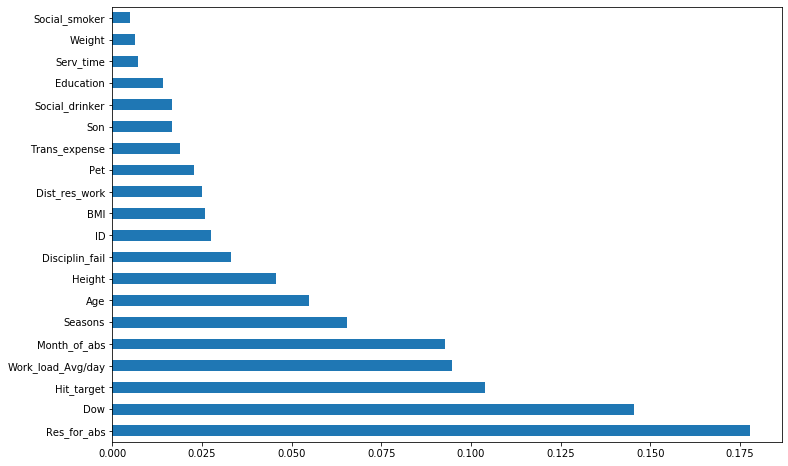

In [40]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(select.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Index(['ID', 'Res_for_abs', 'Month_of_abs', 'Dow', 'Seasons', 'Trans_expense',
       'Dist_res_work', 'Serv_time', 'Age', 'Work_load_Avg/day', 'Hit_target',
       'Disciplin_fail', 'Education', 'Son', 'Social_drinker', 'Social_smoker',
       'Pet', 'Weight', 'Height', 'BMI'],
      dtype='object')

In [57]:
# Feature Scaling

feature_scale = [feature for feature in X.columns if feature not in ['ID']]
                 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data[feature_scale])                 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [58]:
scaler.transform(data[feature_scale])

array([[ 0.80493838,  0.19676258, -0.64394734, ...,  0.85167289,
        -0.01904601,  0.77593223],
       [-2.28012426,  0.19676258, -0.64394734, ...,  1.47305611,
         0.97582783,  1.00943766],
       [ 0.44896961,  0.19676258,  0.0599242 , ...,  0.77399998,
        -0.35067062,  1.00943766],
       ...,
       [-2.28012426, -1.84169773, -0.64394734, ...,  1.47305611,
        -0.35067062,  1.70995395],
       [-2.28012426, -1.84169773,  0.0599242 , ...,  1.62840192,
        -0.35067062,  1.94345938],
       [-2.28012426, -1.84169773,  1.46766727, ..., -0.15807485,
         0.47839091, -0.39159492]])

In [59]:
data = pd.concat([data[['ID', 'AbsHours']].reset_index(drop=True),
                 pd.DataFrame(scaler.transform(data[feature_scale]),
                             columns=feature_scale)],axis=1)

In [60]:
data.head()

,ID,AbsHours,Res_for_abs,Month_of_abs,Dow,Seasons,Trans_expense,Dist_res_work,Serv_time,Age,Work_load_Avg/day,Hit_target,Disciplin_fail,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,BMI
0,11,4,0.804938,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.19285,0.851673,-0.019046,0.775932
1,36,0,-2.280124,0.196763,-0.643947,-1.390175,-1.544379,-1.121694,1.242825,2.092860,-0.818212,0.638686,4.183300,-0.433857,-0.017234,0.872872,-0.280566,-0.56624,1.473056,0.975828,1.009438
2,3,2,0.448970,0.196763,0.059924,-1.390175,-0.632665,1.441240,1.242825,0.239405,-0.818212,0.638686,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,-0.56624,0.774000,-0.350671,1.009438
3,7,4,-1.449530,0.196763,0.763796,-1.390175,0.861947,-1.661258,0.329981,0.393859,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,3.564226,-0.56624,-0.857131,-0.682295,-0.625100
4,11,2,0.448970,0.196763,0.763796,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.19285,0.851673,-0.019046,0.775932


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
X_train.shape, X_test.shape

((518, 20), (222, 20))

In [79]:
lr, knr, dtr, rfr, svc = LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), SVR()

In [80]:
lr.fit(X_train,y_train)
predlr = lr.predict(X_test)
print("R2 Score is: ", r2_score(y_test,predlr))
print("MSE is: ", mean_squared_error(y_test,predlr))
print("MAE is: ", mean_absolute_error(y_test,predlr))

R2 Score is:  0.12399227162282767
MSE is:  147.54542854227344
MAE is:  5.600002466883485


In [81]:
svc.fit(X_train,y_train)
predsvc = svc.predict(X_test)
print("R2 Score is: ", r2_score(y_test,predsvc))
print("MSE is: ", mean_squared_error(y_test,predsvc))
print("MAE is: ", mean_absolute_error(y_test,predsvc))

R2 Score is:  -0.048725596479822775
MSE is:  176.63619000544307
MAE is:  4.6467000213795835


In [82]:
dtr.fit(X_train,y_train)
predlr = dtr.predict(X_test)
print("R2 Score is: ", r2_score(y_test,predlr))
print("MSE is: ", mean_squared_error(y_test,predlr))
print("MAE is: ", mean_absolute_error(y_test,predlr))

R2 Score is:  -1.299103118431037
MSE is:  387.2364864864865
MAE is:  6.608108108108108
